In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты
import seaborn as sns
from sklearn.cluster import KMeans

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка таблиц

In [ ]:
data_2018 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2018.xlsx")

In [ ]:
data_2019 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2019.xlsx")

In [ ]:
data_2020 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2020.xlsx")

In [ ]:
data_2021 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2021.xlsx")

In [ ]:
data_2022 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2022.xlsx")

In [ ]:
#companies = pd.read_excel("/content/drive/MyDrive/ИПС/Данные/Итог.xlsx")

In [ ]:
altman_components = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман со значениями.xlsx")
altman_components

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x4_2021,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column
0,0.132792,0.150271,0.123488,0.080846,30.083555,58.853014,0.026604,0.182458,0.021044,0.002824,...,0.050461,11.000227,55.723564,0.057477,0.140509,0.054547,0.011106,10.813744,52.592245,13333
1,0.047175,0.414882,0.040481,0.000450,6.399180,44.327714,0.036399,0.107456,0.031845,0.016594,...,0.133007,40.255275,60.721032,0.003015,0.244177,0.005419,0.026538,2.242441,50.022248,13951
2,0.016936,0.219454,0.010930,0.004107,1.935829,46.501760,0.017781,0.058766,0.013083,0.001621,...,0.110121,16.954390,68.172145,0.017772,0.050712,0.051831,0.203902,11405.000000,72.630547,32840
3,0.030718,0.337814,0.023916,0.016923,17.616438,53.084890,0.136112,0.288295,0.107279,0.047946,...,0.021798,25.881232,57.767874,0.130456,0.149579,0.105570,0.019036,17.229779,55.000570,37723
4,0.021713,0.327202,0.008214,0.004046,0.605941,43.742576,0.019582,0.306532,0.007622,0.005307,...,0.006680,5.228365,49.510935,0.042792,0.284123,0.014409,0.016640,0.532235,46.364716,50831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.364145,0.115660,0.284339,0.111694,77.290093,63.749443,0.534413,0.146351,0.425280,0.247475,...,0.063550,230.262643,66.763095,0.371051,0.269683,0.291467,0.025774,28.578130,58.222622,160799
810,0.828790,0.737330,0.661423,0.224279,5076.734375,79.790352,0.556392,0.384241,0.444208,0.386879,...,0.194862,319.935331,67.401769,0.301868,0.096536,0.294708,0.471787,99.631076,66.785925,160891
811,0.297018,0.263262,0.231879,0.006651,13.259309,53.439743,0.234432,0.180735,0.178173,0.372994,...,0.095622,17.302898,57.619734,0.151861,0.105087,0.144167,0.261569,28.288004,61.490676,160910
812,0.144957,0.136189,0.074084,0.017812,1.697385,50.337671,0.097732,0.241705,0.044703,0.003287,...,0.005554,1.276515,46.318560,0.177035,0.117589,0.103079,0.023426,3.185545,52.542067,160924


In [ ]:
data_2018['result_2018'].quantile(0.95)

65.47015544215424

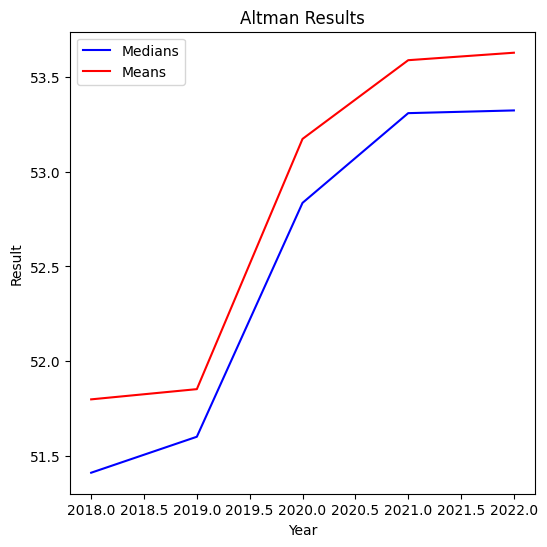

In [ ]:
medians = [data_2018['result_2018'].quantile(0.5), data_2019['result_2019'].quantile(0.5), data_2020['result_2020'].quantile(0.5), data_2021['result_2021'].quantile(0.5), data_2022['result_2022'].quantile(0.5)]
means = [data_2018['result_2018'].mean(), data_2019['result_2019'].mean(), data_2020['result_2020'].mean(), data_2021['result_2021'].mean(), data_2022['result_2022'].mean()]
years = [2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(6, 6))
plt.plot(years, medians, label='Medians', color='blue')
plt.plot(years, means, label='Means', color='red')
plt.xlabel('Year')
plt.ylabel('Result')
plt.title('Altman Results')
plt.legend()
plt.show()



# Немного визуализаций

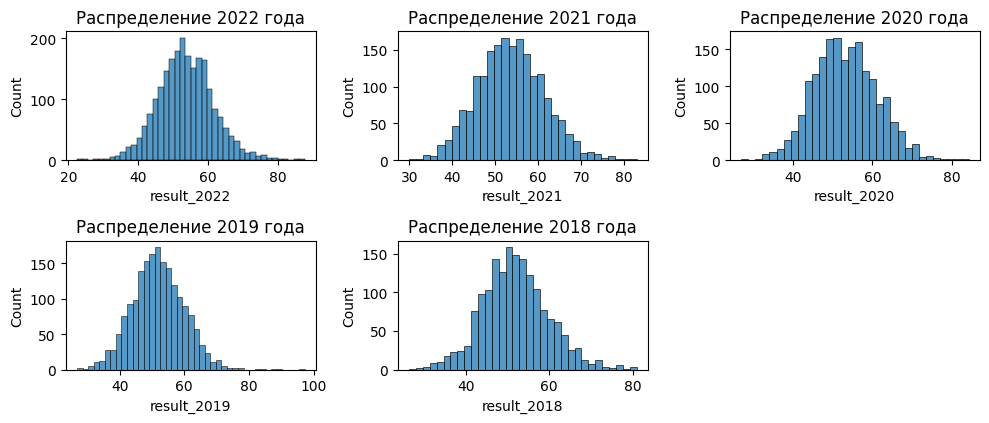

In [ ]:

plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
sns.histplot(data_2022['result_2022'])
plt.title('Распределение 2022 года')

plt.subplot(3, 3, 2)
sns.histplot(data_2021['result_2021'])
plt.title('Распределение 2021 года')

plt.subplot(3, 3, 3)
sns.histplot(data_2020['result_2020'])
plt.title('Распределение 2020 года')

plt.subplot(3, 3, 4)
sns.histplot(data_2019['result_2019'])
plt.title('Распределение 2019 года')

plt.subplot(3, 3, 5)
sns.histplot(data_2018['result_2018'])
plt.title('Распределение 2018 года')

plt.tight_layout()
plt.show()

<Axes: ylabel='result_2022'>

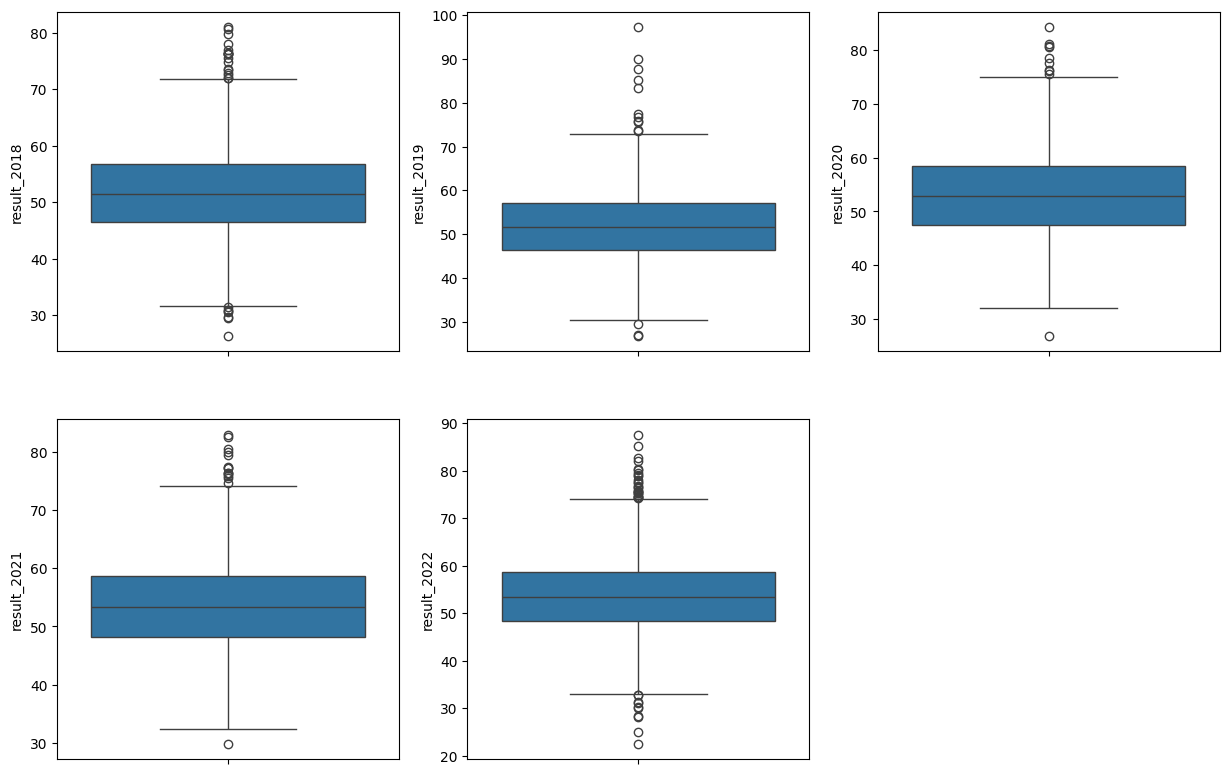

In [ ]:
plt.figure(figsize = (15, 15))

plt.subplot(3, 3, 1)
sns.boxplot(data_2018['result_2018'])

plt.subplot(3, 3, 2)
sns.boxplot(data_2019['result_2019'])

plt.subplot(3, 3, 3)
sns.boxplot(data_2020['result_2020'])

plt.subplot(3, 3, 4)
sns.boxplot(data_2021['result_2021'])

plt.subplot(3, 3, 5)
sns.boxplot(data_2022['result_2022'])

# Кластеризация. Панельные данные

In [ ]:
features = altman_components[['result_2018', 'result_2019', 'result_2020', 'result_2021', 'result_2022']]

clustering = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(features)

clustering.cluster_centers_

array([[44.2254749 , 43.51681583, 45.22045245, 45.28862349, 45.61761823],
       [58.50776856, 58.92525619, 61.47357563, 61.48658812, 59.84719595],
       [51.25061619, 51.18705891, 52.27353302, 53.06606533, 52.85814781]])

In [ ]:
altman_components['cluster_number'] = clustering.labels_
altman_components

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column,cluster_number
0,0.132792,0.150271,0.123488,0.080846,30.083555,58.853014,0.026604,0.182458,0.021044,0.002824,...,11.000227,55.723564,0.057477,0.140509,0.054547,0.011106,10.813744,52.592245,13333,2
1,0.047175,0.414882,0.040481,0.000450,6.399180,44.327714,0.036399,0.107456,0.031845,0.016594,...,40.255275,60.721032,0.003015,0.244177,0.005419,0.026538,2.242441,50.022248,13951,2
2,0.016936,0.219454,0.010930,0.004107,1.935829,46.501760,0.017781,0.058766,0.013083,0.001621,...,16.954390,68.172145,0.017772,0.050712,0.051831,0.203902,11405.000000,72.630547,32840,1
3,0.030718,0.337814,0.023916,0.016923,17.616438,53.084890,0.136112,0.288295,0.107279,0.047946,...,25.881232,57.767874,0.130456,0.149579,0.105570,0.019036,17.229779,55.000570,37723,2
4,0.021713,0.327202,0.008214,0.004046,0.605941,43.742576,0.019582,0.306532,0.007622,0.005307,...,5.228365,49.510935,0.042792,0.284123,0.014409,0.016640,0.532235,46.364716,50831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.364145,0.115660,0.284339,0.111694,77.290093,63.749443,0.534413,0.146351,0.425280,0.247475,...,230.262643,66.763095,0.371051,0.269683,0.291467,0.025774,28.578130,58.222622,160799,1
810,0.828790,0.737330,0.661423,0.224279,5076.734375,79.790352,0.556392,0.384241,0.444208,0.386879,...,319.935331,67.401769,0.301868,0.096536,0.294708,0.471787,99.631076,66.785925,160891,1
811,0.297018,0.263262,0.231879,0.006651,13.259309,53.439743,0.234432,0.180735,0.178173,0.372994,...,17.302898,57.619734,0.151861,0.105087,0.144167,0.261569,28.288004,61.490676,160910,1
812,0.144957,0.136189,0.074084,0.017812,1.697385,50.337671,0.097732,0.241705,0.044703,0.003287,...,1.276515,46.318560,0.177035,0.117589,0.103079,0.023426,3.185545,52.542067,160924,2


In [ ]:
cluster_counts = altman_components['cluster_number'].value_counts()
print(cluster_counts)

cluster_number
2    377
0    231
1    206
Name: count, dtype: int64


кластеризуем по кажому году и проследим, происходил ли переход

In [ ]:
clustering18 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2018'].values.reshape(-1, 1))


clustering19 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2019'].values.reshape(-1, 1))


clustering20 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2020'].values.reshape(-1, 1))


clustering21 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2021'].values.reshape(-1, 1))


clustering22 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2022'].values.reshape(-1, 1))


In [ ]:
clustered_data = pd.DataFrame()

cluster_mapping = {0: 0, 1: 1, 2: 2}

for year in range(2018, 2023):
    clustered_data[f'result_{year}'] = altman_components[f'result_{year}']
    clustering = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components[f'result_{year}'].values.reshape(-1, 1))
    centroids = clustering.cluster_centers_.flatten()
    sorted_clusters = [x for _, x in sorted(zip(centroids, range(3)))]
    cluster_mapping = {0: 0, 1: 1, 2: 2}
    clustered_data[f'cluster_number{year}'] = [cluster_mapping[sorted_clusters[cluster]] for cluster in clustering.labels_]

clustered_data

,result_2018,cluster_number2018,result_2019,cluster_number2019,result_2020,cluster_number2020,result_2021,cluster_number2021,result_2022,cluster_number2022
0,58.853014,2,47.162188,1,54.650259,2,55.723564,2,52.592245,2
1,44.327714,0,54.043415,1,63.994676,0,60.721032,0,50.022248,2
2,46.501760,0,48.941816,1,57.880998,2,68.172145,0,72.630547,0
3,53.084890,1,60.158125,2,47.371356,1,57.767874,2,55.000570,2
4,43.742576,0,44.190868,0,48.401878,1,49.510935,2,46.364716,1
...,...,...,...,...,...,...,...,...,...,...
809,63.749443,2,68.025688,2,69.988335,0,66.763095,0,58.222622,0
810,79.790352,2,69.581279,2,67.146026,0,67.401769,0,66.785925,0
811,53.439743,1,60.808089,2,63.271120,0,57.619734,2,61.490676,0
812,50.337671,1,45.434377,0,50.859251,2,46.318560,1,52.542067,2


матрица миграций 18-19

In [ ]:
migration_matrix18 = np.zeros((3, 3))

for year in range(2018, 2019):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix18[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2018:")
migration_matrix18

Migration Matrix 2018:


array([[170.,  83.,   1.],
       [ 64., 250.,  74.],
       [  3.,  51., 118.]])

In [ ]:
migration_matrix19 = np.zeros((3, 3))

for year in range(2019, 2020):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix19[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2019:")
migration_matrix19

Migration Matrix 2019:


array([[  7., 158.,  72.],
       [ 49.,  94., 241.],
       [123.,  10.,  60.]])

In [ ]:
migration_matrix20 = np.zeros((3, 3))

for year in range(2020, 2021):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix20[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2020:")
migration_matrix20

Migration Matrix 2020:


array([[130.,   4.,  45.],
       [  5., 157., 100.],
       [ 63.,  62., 248.]])

In [ ]:
migration_matrix21 = np.zeros((3, 3))

for year in range(2021, 2022):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix21[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2022:")
migration_matrix21

Migration Matrix 2022:


array([[133.,  11.,  54.],
       [  4., 135.,  84.],
       [ 71.,  62., 260.]])

In [ ]:
def markov_process(transition_matrix, current_state, num_steps):
    states = [current_state]

    for _ in range(num_steps):
        next_state = np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_state])
        states.append(next_state)
        current_state = next_state

    return states

# Альтман по годам

In [ ]:
cluster_centers_years = [{}, {}, {}, {}, {}]
cluster_quantity_years = [{}, {}, {}, {}, {}]

In [ ]:
clustering_18 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2018['result_2018'].values.reshape(-1, 1))
clustering_18.cluster_centers_

array([[52.61028917],
       [43.24638851],
       [63.02421565]])

In [ ]:
for i in range(3):
  cluster_centers_years[0][i] = clustering_18.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[0][i] = cluster_counts_18[i]

cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
data_2018['cluster_number'] = clustering_18.labels_
cluster_counts_18 = data_2018['cluster_number'].value_counts()
cluster_counts_18

cluster_number
0    804
1    541
2    351
Name: count, dtype: int64

In [ ]:
clustering_19 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2019['result_2019'].values.reshape(-1, 1))
clustering_19.cluster_centers_

array([[61.80979082],
       [42.36245115],
       [51.72133307]])

In [ ]:
for i in range(3):
  cluster_centers_years[1][i] = clustering_19.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[1][i] = cluster_counts_19[i]

cluster_centers_years
cluster_quantity_years

[{0: 804, 1: 541, 2: 351}, {0: 496, 1: 515, 2: 858}, {}, {}, {}]

In [ ]:
data_2019['cluster_number'] = clustering_19.labels_
cluster_counts_19 = data_2019['cluster_number'].value_counts()
cluster_counts_19

cluster_number
2    858
1    515
0    496
Name: count, dtype: int64

In [ ]:
clustering_20 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2020['result_2020'].values.reshape(-1, 1))
clustering_20.cluster_centers_

array([[64.0704531 ],
       [44.82621156],
       [54.2367288 ]])

In [ ]:
data_2020['cluster_number'] = clustering_20.labels_
cluster_counts_20 = data_2020['cluster_number'].value_counts()
cluster_counts_20

cluster_number
2    788
1    639
0    418
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[2][i] = clustering_20.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[2][i] = cluster_counts_20[i]

cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
clustering_21 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2021['result_2021'].values.reshape(-1, 1))
clustering_21.cluster_centers_

array([[63.44707015],
       [44.32535965],
       [53.61530582]])

In [ ]:
data_2021['cluster_number'] = clustering_21.labels_
cluster_counts_21 = data_2021['cluster_number'].value_counts()
cluster_counts_21

cluster_number
2    898
1    546
0    505
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[3][i] = clustering_21.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[3][i] = cluster_counts_21[i]


cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
clustering_22 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2022['result_2022'].values.reshape(-1, 1))
clustering_22.cluster_centers_

array([[53.48712375],
       [63.43844632],
       [44.02972053]])

In [ ]:
data_2022['cluster_number'] = clustering_22.labels_
cluster_counts_22 = data_2022['cluster_number'].value_counts()
cluster_counts_22

cluster_number
0    1080
2     601
1     595
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[4][i] = clustering_22.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[4][i] = cluster_counts_22[i]


cluster_centers_years
cluster_quantity_years

[{0: 804, 1: 541, 2: 351},
 {0: 496, 1: 515, 2: 858},
 {0: 418, 1: 639, 2: 788},
 {0: 505, 1: 546, 2: 898},
 {0: 1080, 1: 595, 2: 601}]

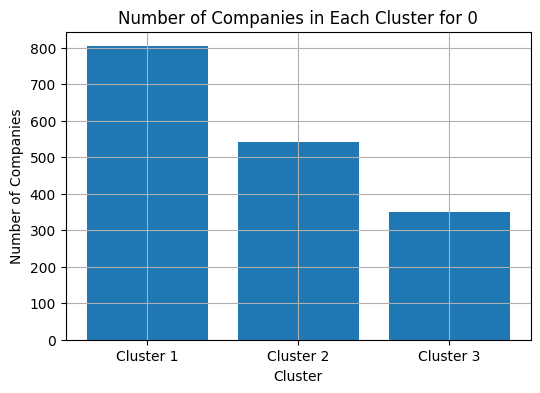

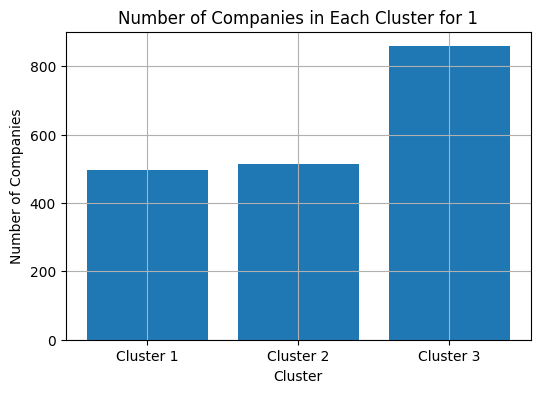

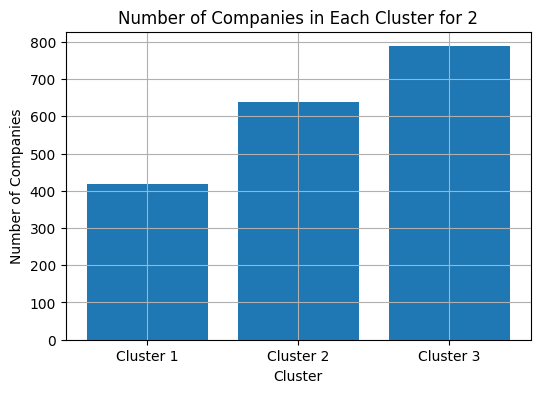

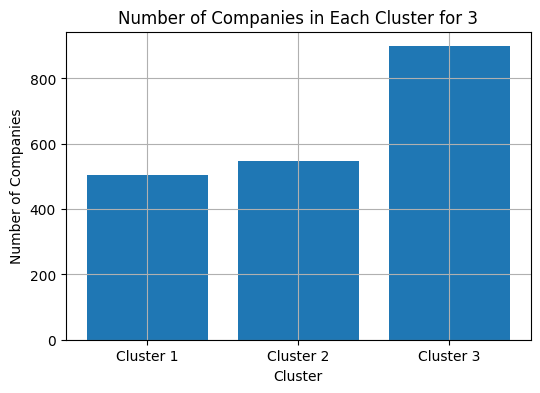

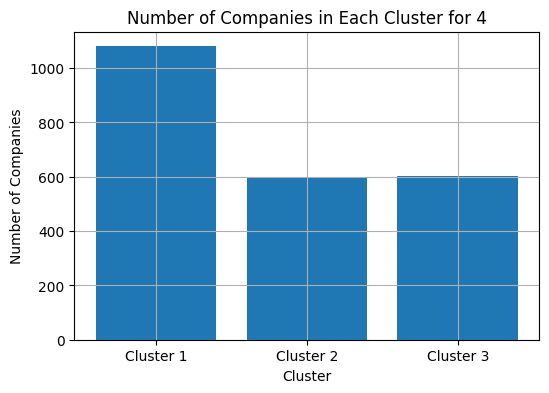

In [ ]:
for year in years:
    plt.figure(figsize=(6, 4))
    cluster_values = [cluster_quantity_years[year][i] for i in range(3)]
    plt.bar(range(1, 4), cluster_values)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Companies')
    plt.title(f'Number of Companies in Each Cluster for {year}')
    plt.xticks(range(1, 4), [f'Cluster {i+1}' for i in range(3)])
    plt.grid(True)
    plt.show()